# Resales

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

Data on resales activity in the Calgary CMA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial')


## Resales

In [3]:
df = pd.read_csv('..\\data\\pareto\\sales_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\sales_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_act.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\snl_sa.csv',index_col=0))
df.index=df.index.rename('Date')
df.index=pd.DatetimeIndex(df.index,freq='QS-OCT')

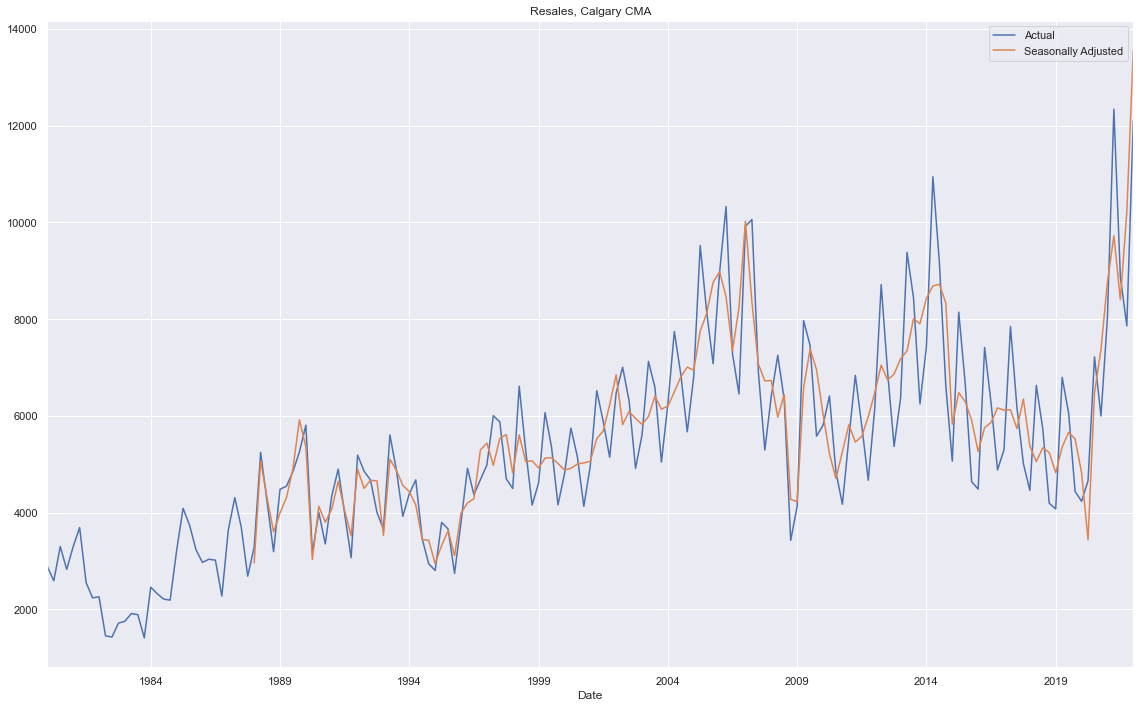

In [4]:
df[['sales_act','sales_sa']].plot(title='Resales, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/resale_full.png')

Source: Pareto/CREA

Resale activity in Calgary historically has experienced several cycles that followed closely to expecations and performance of the energy sector, a key part of Calgary's economy. Population growth in the 90s and early 2000s also corresponded with increasing home sales activity.

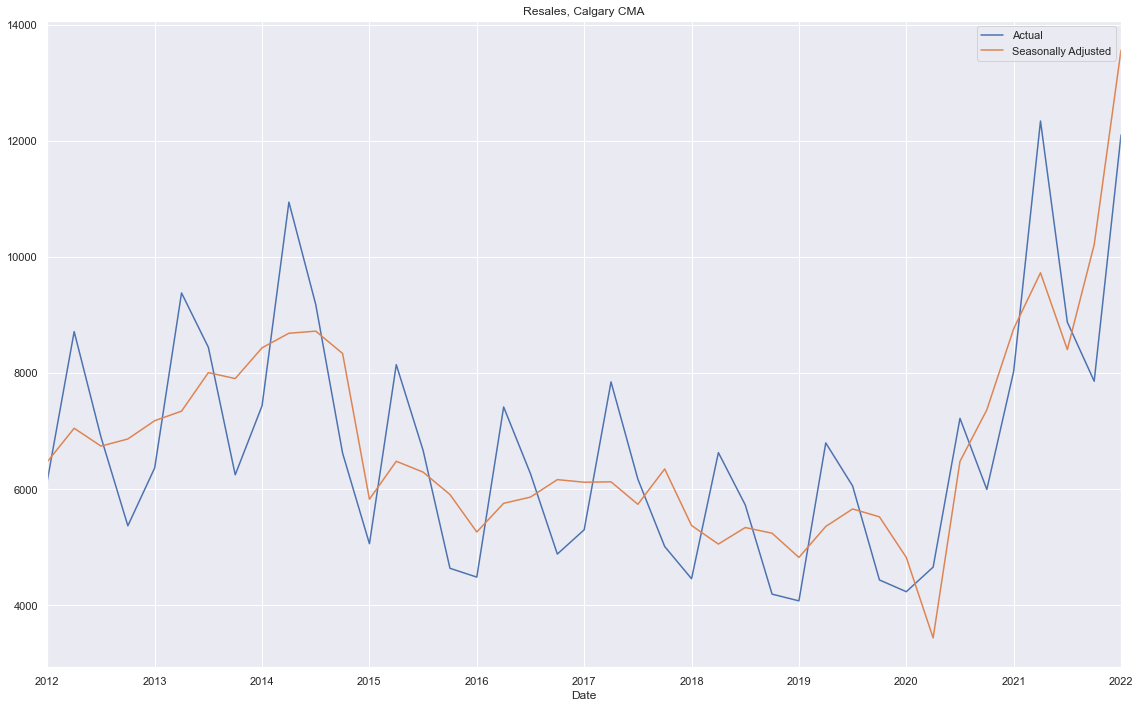

In [5]:
df[['sales_act','sales_sa']]['2012':].plot(title='Resales, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/resale_short.png')

In the most recent decade, activity peaked in 2014, after oil prices collapsed and subsequently the energy sector experienced a protracted downturn. This led to a period of muted housing activity, where Calgary experienced less demand as energy sector jobs dried up. This downtrend in sales activity ended in 2020, when the beginning of the COVID-19 pandemic marked the bottom of sales activity.

Since then, with easy monetary policy, and positive expectations for the future, Calgary home sales have reached an all time high.

## New Listings

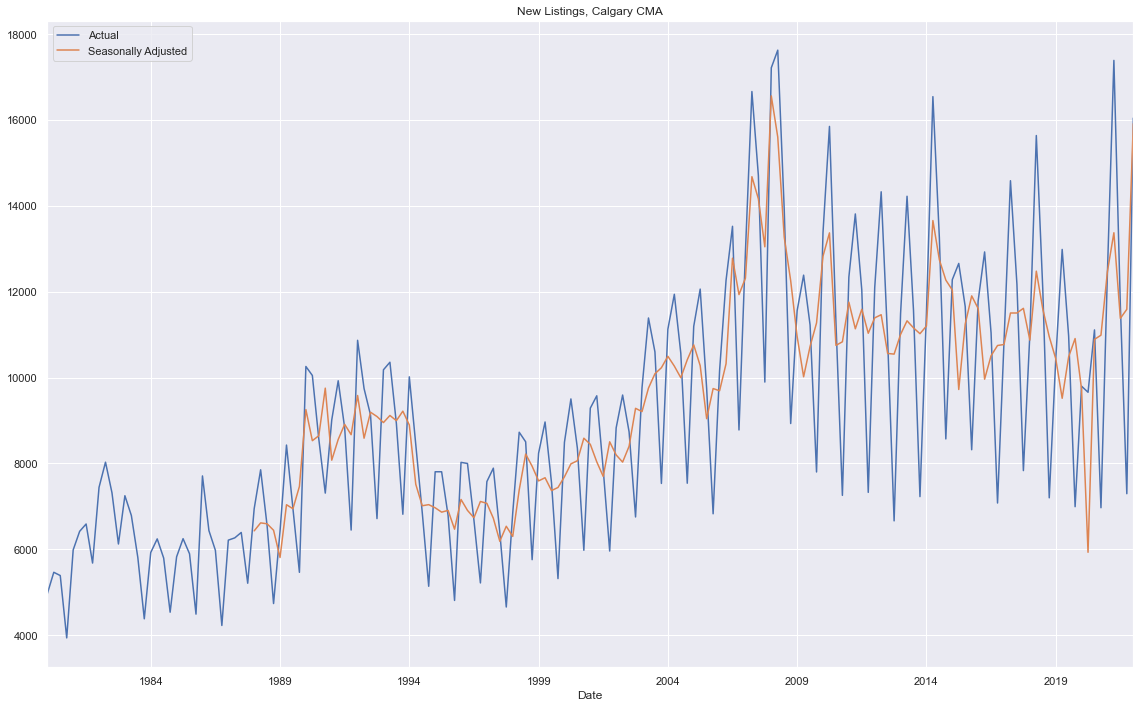

In [6]:
df[['new_list_act','new_list_sa']].plot(title='New Listings, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/newlist_full.png')

Source: Pareto/CREA

Historically, new listing activity also mostly followed sales activity, as sales moved higher, so would new listings. New listings post 2014 also remained fairly high, compared to before the oil bust.

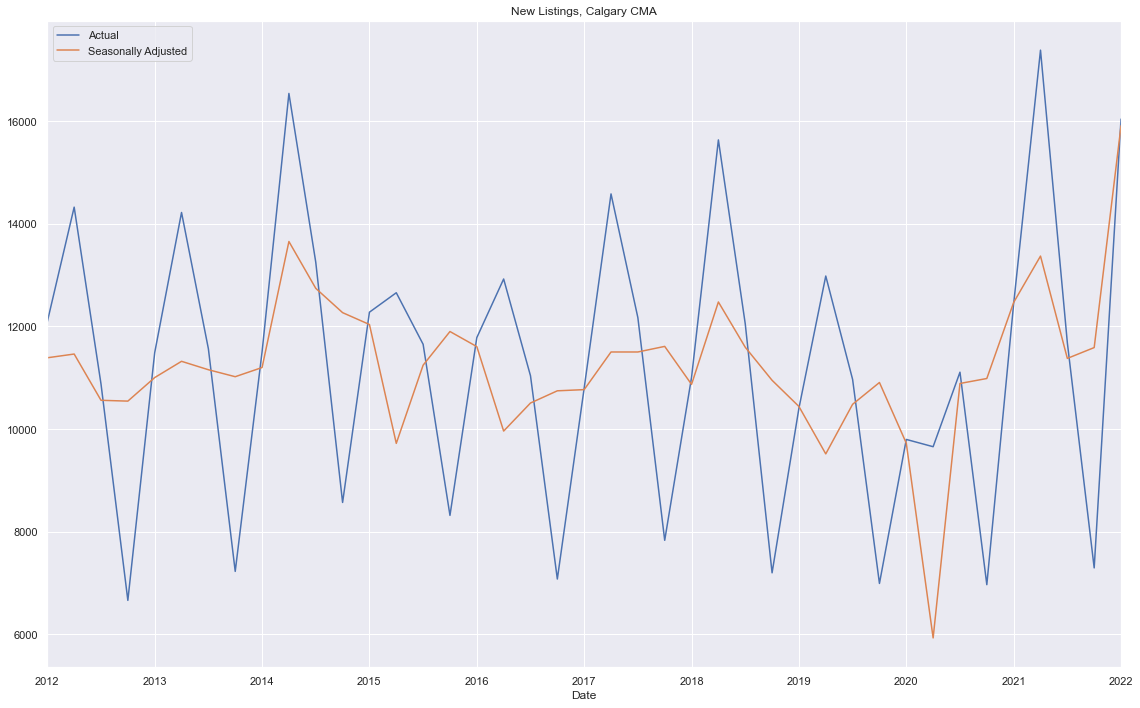

In [7]:
df[['new_list_act','new_list_sa']]['2012':].plot(title='New Listings, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/resale_short.png')

However, in the most recent quarters, new listings have not reached a new high to keep pace with sales activity. 

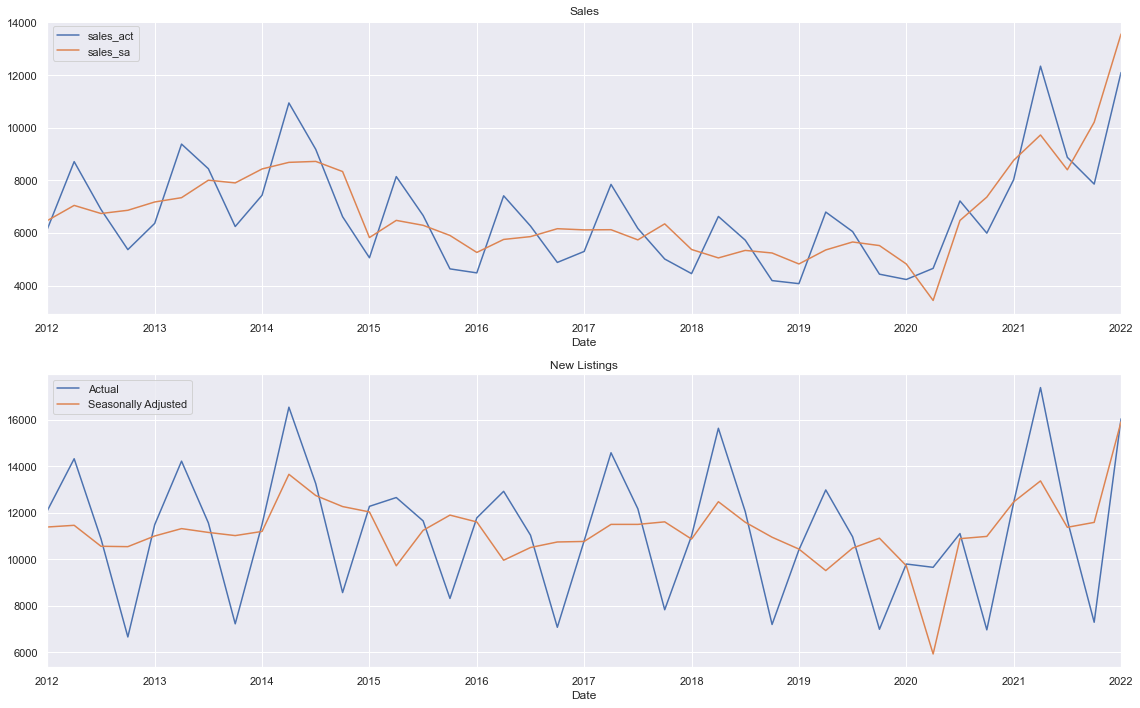

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,10))

df[['sales_act','sales_sa']]['2012':].plot(ax=ax[0],title='Sales')
plt.legend(['Actual','Seasonally Adjusted'])

df[['new_list_act','new_list_sa']]['2012':].plot(ax=ax[1],title='New Listings')
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()



With that said, a market with low listings and strong demand from sales activity result in fairly hot market conditions, as shown by the sales to new listings ratio.  

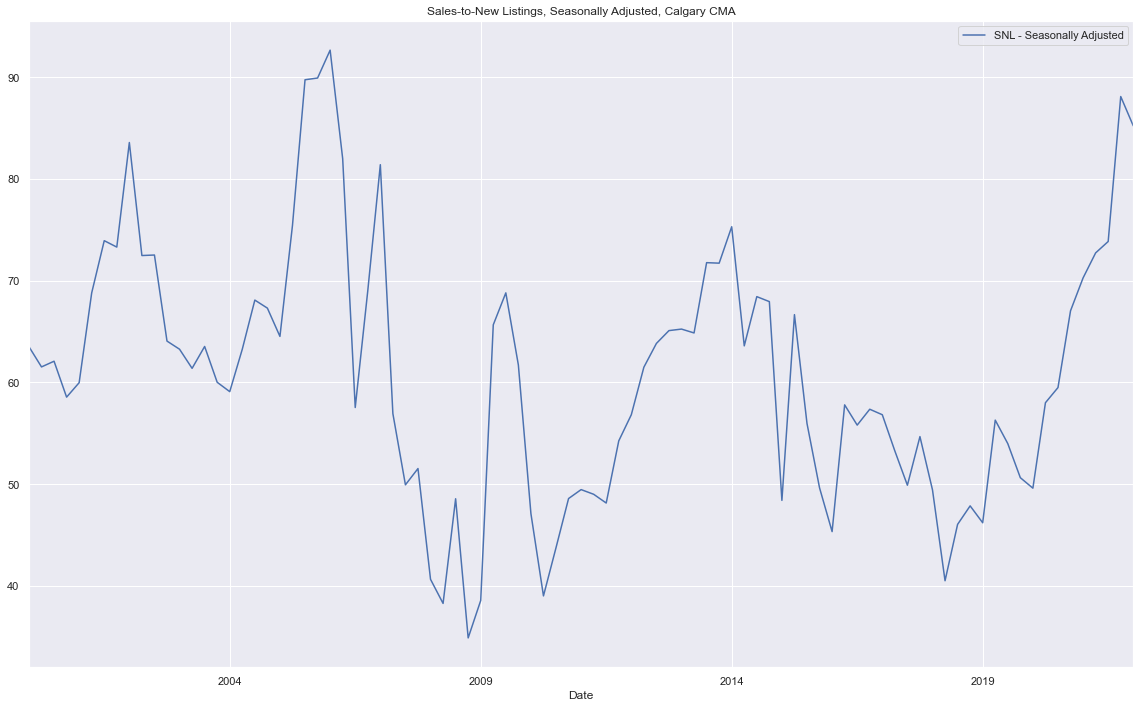

In [9]:
df[['snl_sa']]['2000':].plot(title='Sales-to-New Listings, Seasonally Adjusted, Calgary CMA', figsize=(16,10))
plt.legend(['SNL - Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/snl_short.png')

Sales to new listings are much higher than previous peaks in 2009 and 2014, close to highs seen in the early 2000s, where price growth was rapid.

## Average Prices

In [10]:
#reading prices
prices = pd.read_csv('..\\data\\pareto\\avg_price_act.csv',index_col=0)
prices=prices.join(pd.read_csv('..\\data\\pareto\\avg_price_sa.csv',index_col=0))
prices.index=prices.index.rename('Date')
prices.index=pd.DatetimeIndex(prices.index,freq='QS-OCT')

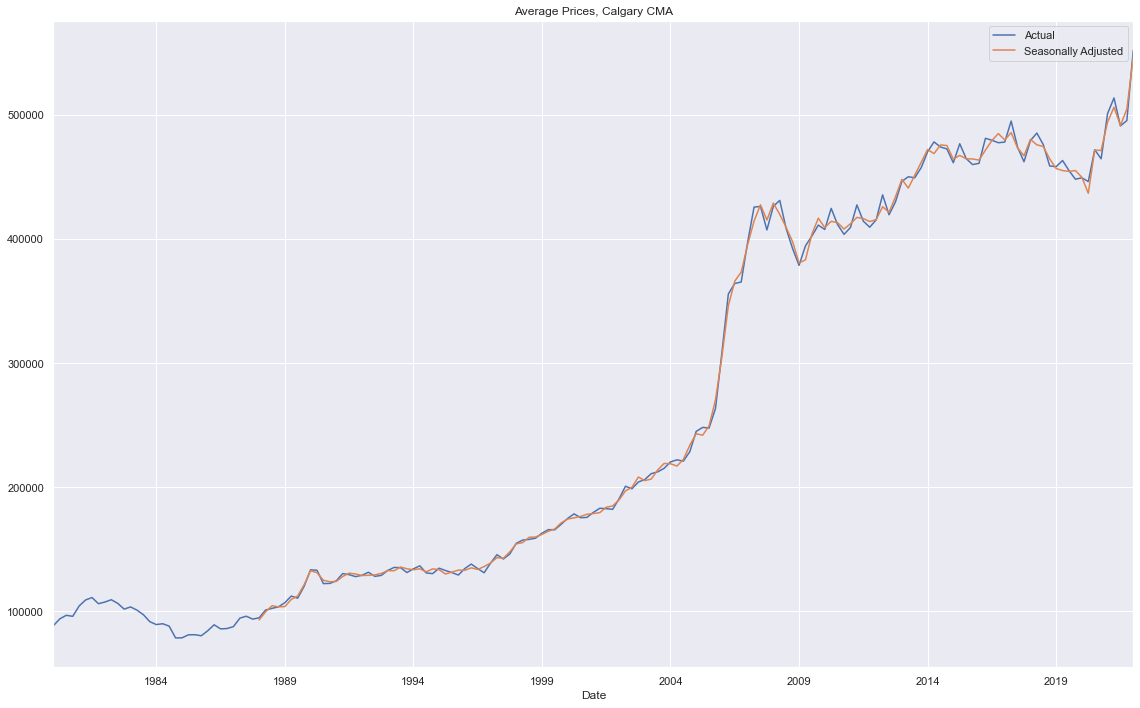

In [11]:
prices[['avg_price_act','avg_price_sa']].plot(title='Average Prices, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/avg_price_full.png')

Rapid growth in prices was seen in the late 2000s, with another period of price growth in the early 2010s. Protracted weaker periods of housing activity however, did not lead to significant decreases in average prices in recent years.

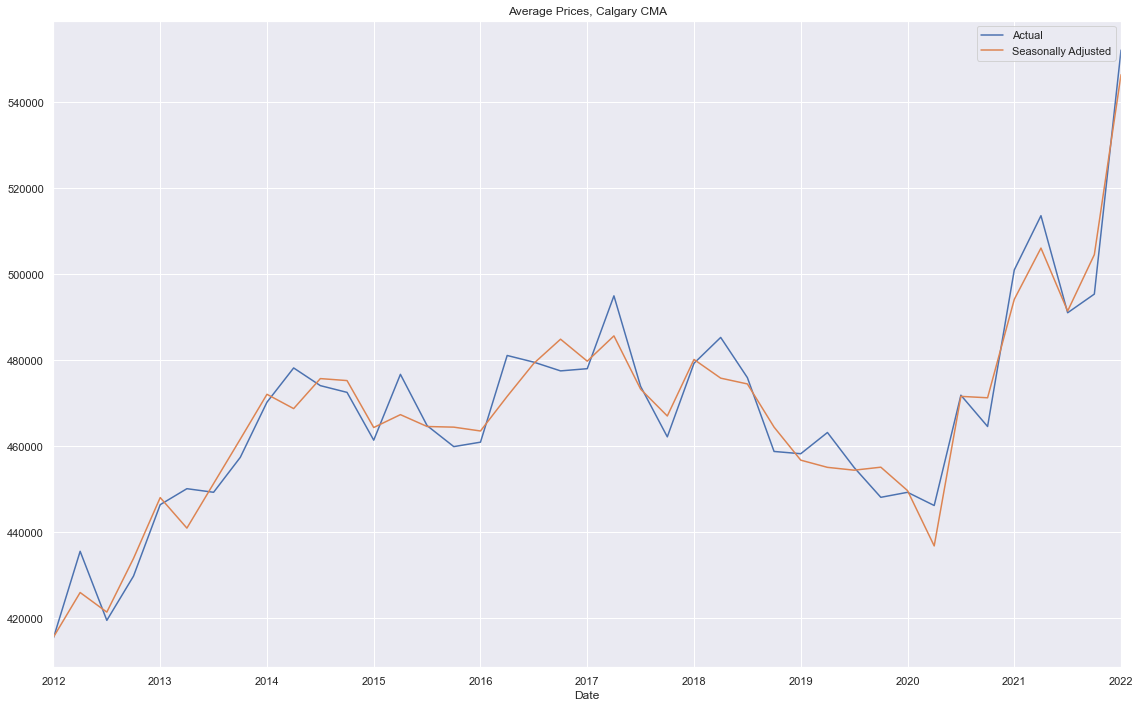

In [12]:
prices[['avg_price_act','avg_price_sa']]['2012':].plot(title='Average Prices, Calgary CMA', figsize=(16,10))
plt.legend(['Actual','Seasonally Adjusted'])
plt.tight_layout()
plt.savefig('kbase_graphs/avg_price_short.png')

Even though sales activity slowed down post 2014, average prices remained stable as new homes coming on to the market commanded higher prices. While there was a decreasing trend since 2017, prices quickly rebounded post 2020 as hot market conditions prevailed.

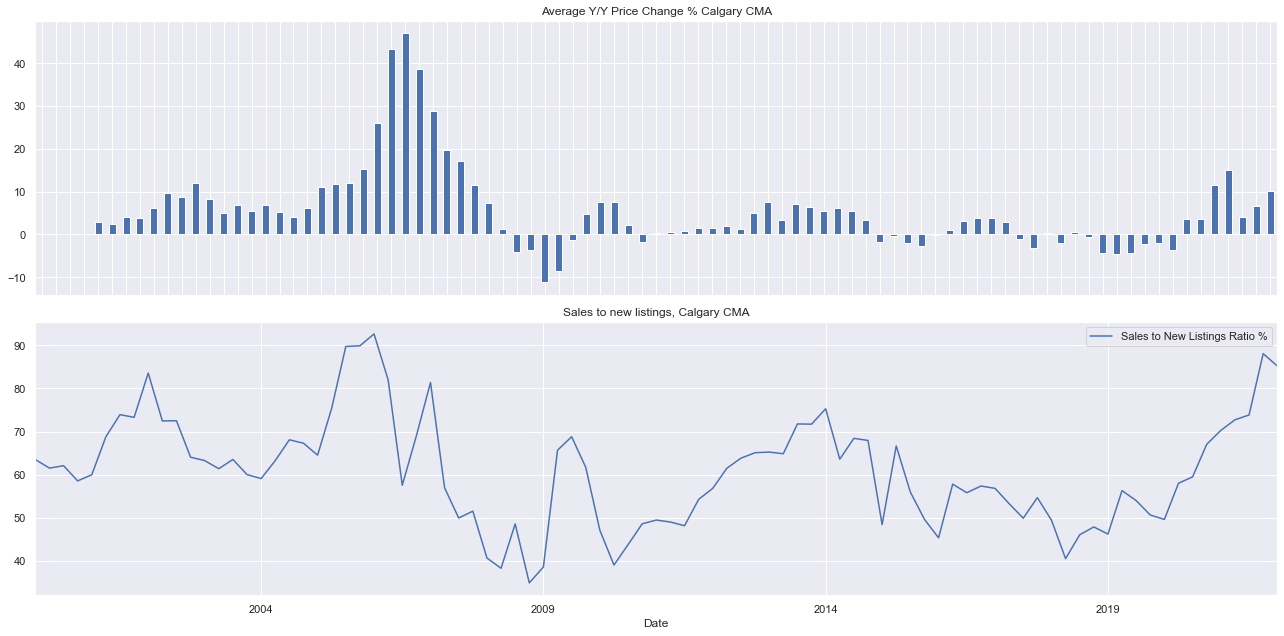

In [13]:

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(18,9))

(prices['avg_price_act']['2000':].pct_change(4)*100).plot(ax=ax[0],title='Average Y/Y Price Change % Calgary CMA', kind='bar',sharex=True)
plt.legend(['Percentage Price Change'])

df[['snl_sa']]['2000':].plot(ax=ax[1],title='Sales to new listings, Calgary CMA')
plt.legend(['Sales to New Listings Ratio %'])

plt.tight_layout()
plt.savefig('kbase_graphs/snl_price.png')

A small lag seems to exist for price changes compared to sales-to-new listings in Calgary

# CREB Resales Data

In [3]:
from os import listdir
from os.path import isfile

data_path = '..\\data\\calgary_resales\\'

files = listdir(data_path)


resales_df = pd.DataFrame()
for file in files:
    file_path = data_path+file
    if resales_df.empty:
        resales_df = pd.read_csv(file_path,parse_dates=True,index_col=0)
    
    else:
       resales_df=resales_df.join(pd.read_csv(file_path,parse_dates=True,index_col=0))


In [4]:
resales_df

,apartment_active_listings,apartment_avg_price,apartment_benchmark_price,apartment_dom,apartment_new_listings,apartment_sales,apartment_slpr,detached_active_listings,detached_avg_price,detached_benchmark_price,...,semi-detached_sales,semi-detached_slpr,total_active_listings,total_avg_price,total_benchmark_price,total_dom,total_hpi,total_new_listings,total_sales,total_slpr
2006-01-31,262.0,207293.0,164300.0,32.0,444.0,336.0,0.9812,658.0,348016.0,290600.0,...,NaN,NaN,1120.0,313133.0,254500.0,27.0,119.0,2493.0,1993.0,0.9917
2006-02-28,206.0,207658.0,171200.0,21.0,451.0,470.0,0.9927,650.0,368067.0,308900.0,...,NaN,NaN,987.0,316531.0,268900.0,18.0,125.0,2709.0,2601.0,0.9972
2006-03-31,158.0,230784.0,183400.0,17.0,522.0,539.0,1.0048,837.0,391009.0,328500.0,...,NaN,NaN,1161.0,337067.0,286000.0,15.0,133.0,3351.0,2912.0,1.0002
2006-04-30,145.0,247184.0,195200.0,14.0,453.0,438.0,1.0174,806.0,399714.0,348700.0,...,NaN,NaN,1100.0,350959.0,304000.0,14.0,142.0,3019.0,2830.0,1.0082
2006-05-31,170.0,267452.0,213000.0,13.0,572.0,512.0,1.0197,922.0,427330.0,372400.0,...,NaN,NaN,1282.0,372499.0,326800.0,14.0,152.0,3466.0,2923.0,1.0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,1273.0,276383.0,272600.0,34.0,893.0,642.0,0.9810,2459.0,669028.0,628900.0,...,304.0,1.0114,4850.0,532093.0,526700.0,22.0,239.0,4577.0,3401.0,1.0068
2022-05-31,1416.0,288580.0,275300.0,34.0,949.0,631.0,0.9818,2552.0,660124.0,648500.0,...,265.0,0.9984,5200.0,520013.0,546000.0,25.0,271.0,4294.0,3071.0,0.9997
2022-06-30,1526.0,279802.0,277400.0,34.0,932.0,581.0,0.9754,2667.0,667673.0,647500.0,...,223.0,0.9910,5405.0,517059.0,543900.0,27.0,270.0,4061.0,2842.0,0.9910
2022-07-31,1576.0,275247.0,278800.0,37.0,798.0,513.0,0.9701,2596.0,637269.0,643600.0,...,173.0,0.9937,5338.0,491392.0,540000.0,31.0,268.0,3174.0,2254.0,0.9821


## Total Average Price

<AxesSubplot:>

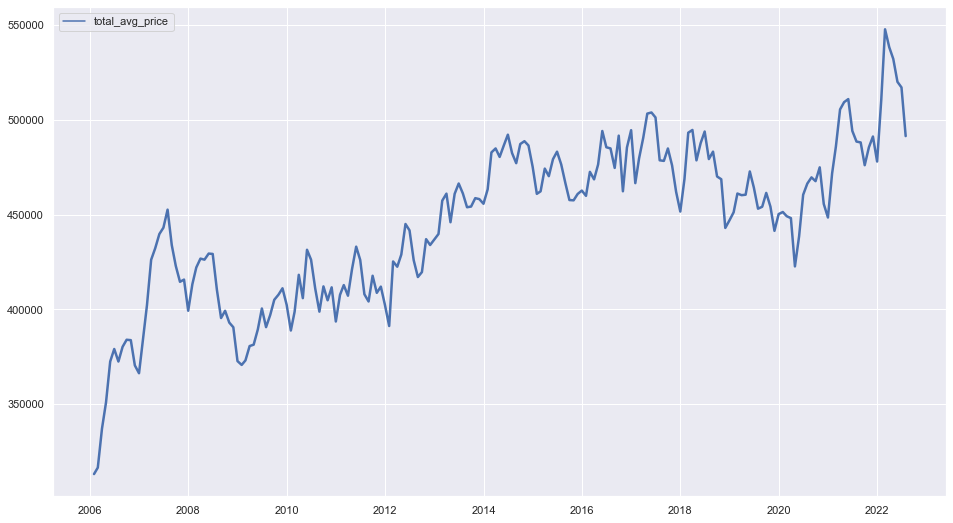

In [5]:
fig,ax=plt.subplots(figsize=(16,9))



sns.lineplot(data=[resales_df['total_avg_price']],linewidth=2.5,ax=ax)

## Total HPI

<AxesSubplot:ylabel='total_hpi'>

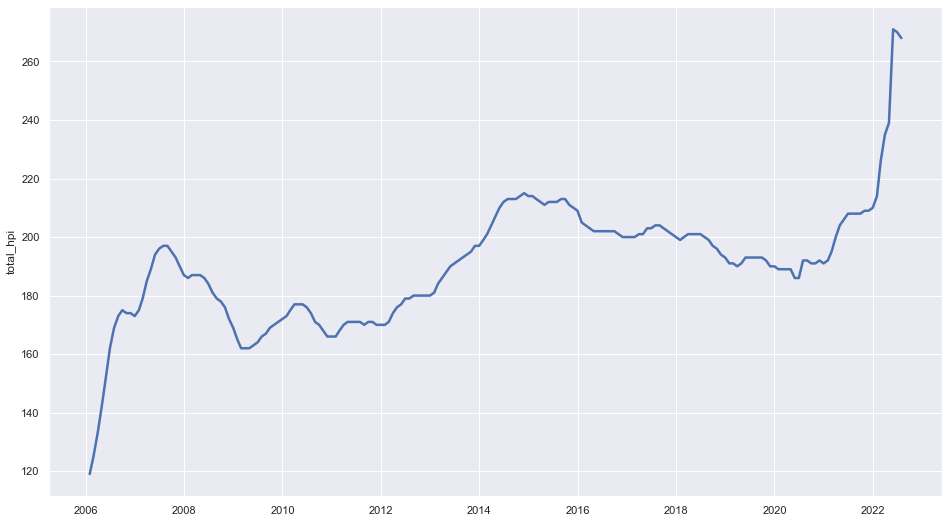

In [7]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df['total_hpi'],linewidth=2.5,ax=ax)

## Total Sales

<AxesSubplot:ylabel='total_sales'>

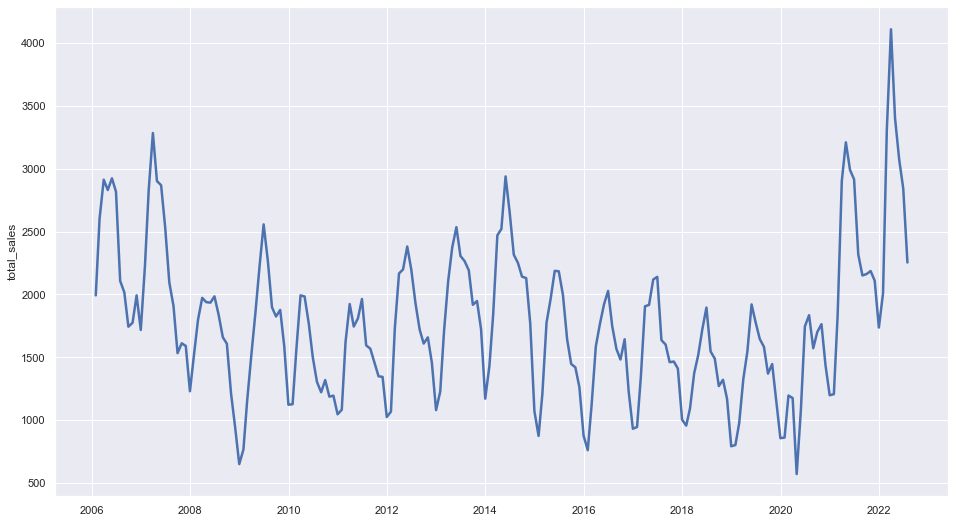

In [8]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df['total_sales'],linewidth=2.5,ax=ax)

## Total Active Listings

<AxesSubplot:ylabel='total_active_listings'>

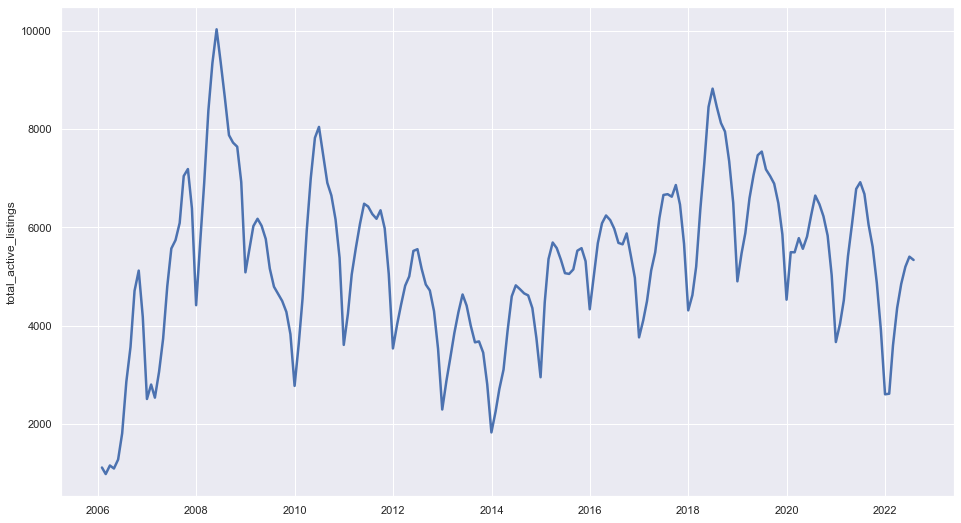

In [9]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df['total_active_listings'],linewidth=2.5,ax=ax)

## Sales to Active Listings

<AxesSubplot:>

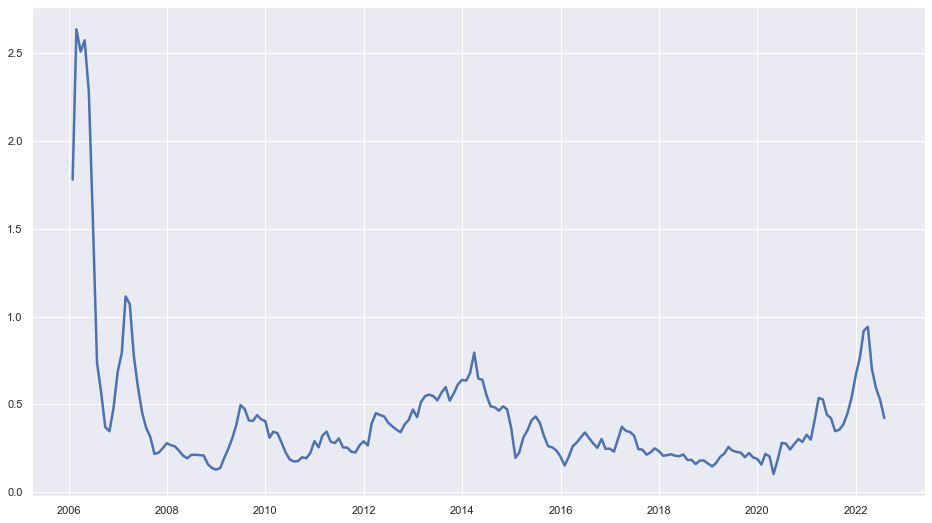

In [10]:
sales_act =resales_df['total_sales']/resales_df['total_active_listings']

fig,ax=plt.subplots(figsize=(16,9))
sns.lineplot(data=sales_act,linewidth=2.5,ax=ax)

## Average prices across types

<AxesSubplot:>

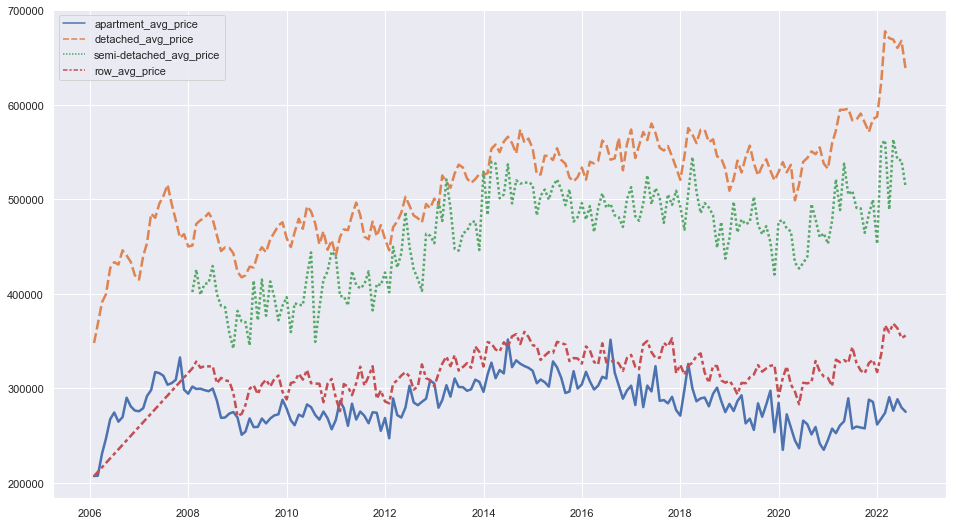

In [11]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df[['apartment_avg_price','detached_avg_price','semi-detached_avg_price','row_avg_price']],linewidth=2.5,ax=ax)

As you can see, detached and semi-detached homes trade closer in price while apartment and row types are also similar with each other. As semi-detached unit stock is relatively low, its series is more volatile. 

Interestingly, apartment prices are still somewhat muted compared to other units given the price increases in 2020-2021. 

Vast majority of price increases are from single detached homes, while there is some price increase in townhomes.

## Monthly Sales by Unit Type

<AxesSubplot:>

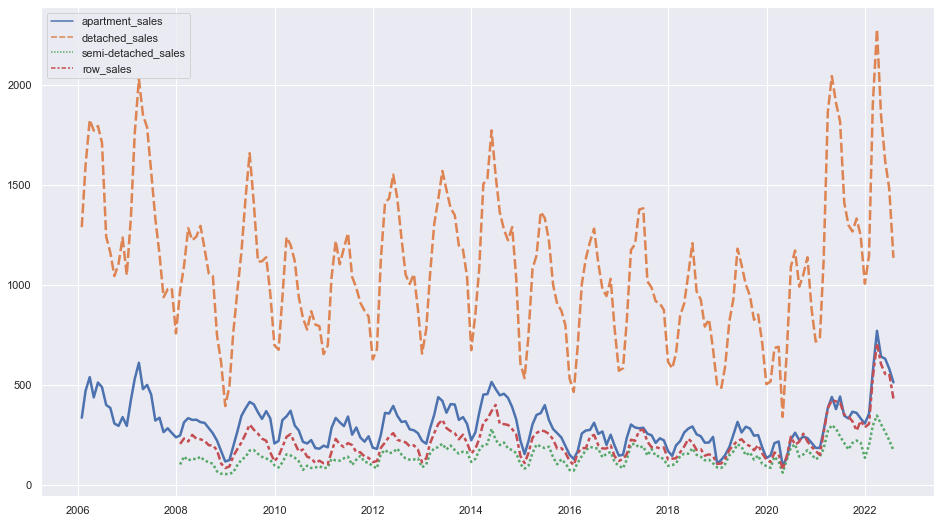

In [12]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df[['apartment_sales','detached_sales','semi-detached_sales','row_sales']],linewidth=2.5,ax=ax)

Single detached sales reflect larger stock and demand of homes in Calgary historically. Of note here is that in past history, apartment sales were notable higher than row/townhouse sales, but since 2020, these have tracked together more closely. Relative strength is much stronger in apartment/row homes in recent months, compared to single detached. 

## Active listings by type

<AxesSubplot:>

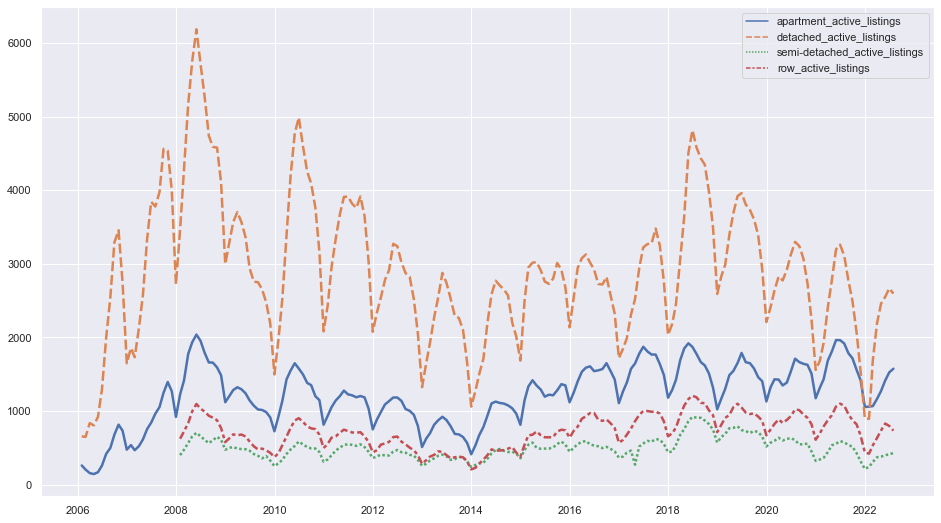

In [13]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df[['apartment_active_listings','detached_active_listings','semi-detached_active_listings','row_active_listings']],linewidth=2.5,ax=ax)

Active listings have trended lower since 2018, especially for single detached homes, before reaching a clear low in early 2022. This has since bounced up due to seasonality, with more active listings online in warmer months.

## Sale to List Price Ratio

<AxesSubplot:>

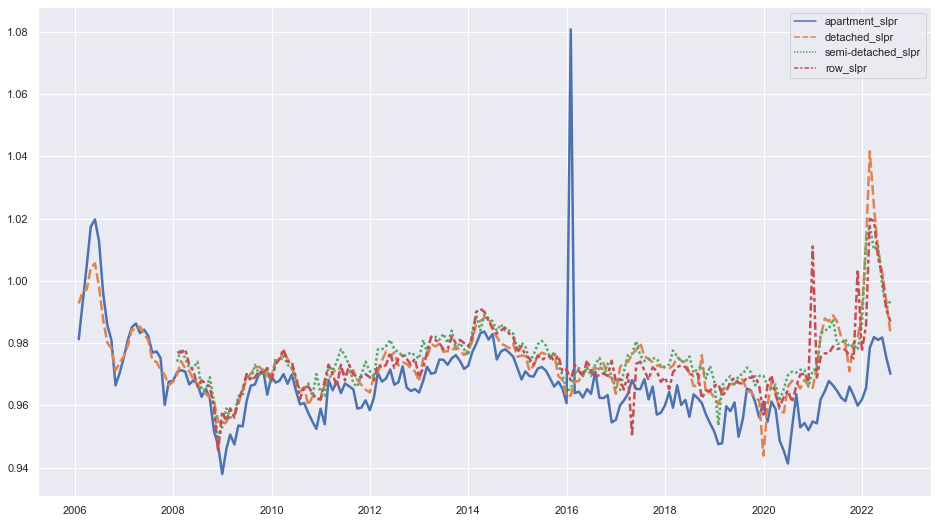

In [14]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df[['apartment_slpr','detached_slpr','semi-detached_slpr','row_slpr']],linewidth=2.5,ax=ax)

The sales to list price ratio indicate demand for homes, with sales being closed compared to its listing price. In 2021 and 2022 this has risen above 1.0, indicating sold price on average trading above list prices. This was not even seen during 2014, the last time when demand was significant in Calgary.

## Days on Market by Unit Type

<AxesSubplot:>

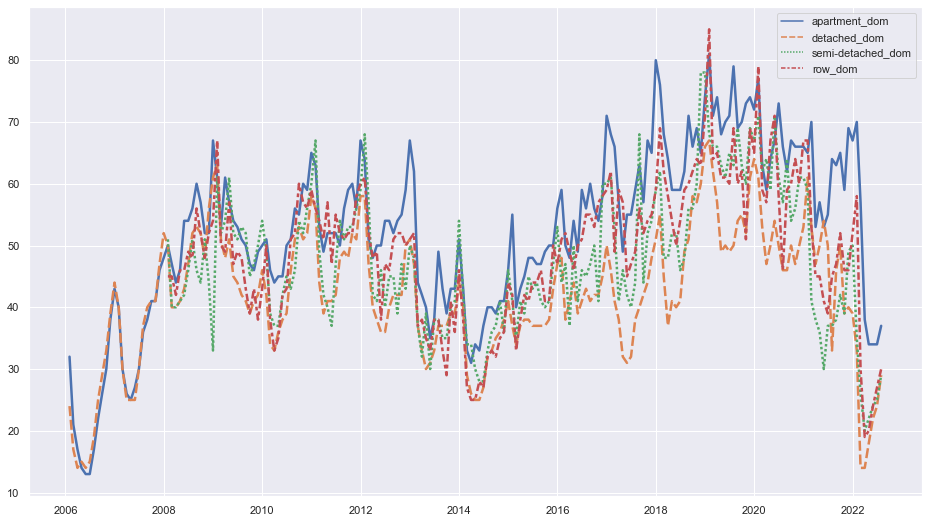

In [15]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=resales_df[['apartment_dom','detached_dom','semi-detached_dom','row_dom']],linewidth=2.5,ax=ax)

Days of market for different unit types generally track together, but they have reached near all time lows in early 2022. Days of market for Apartments are also quite a bit higher than the rest of the units, indicating closer matched demand and supply, while detached, row, and semi-detached units see more demand compared to supply available.